
# Business Understanding

Our company is expanding into the aviation industry. To support this endeavor, our goal is to analyze aviation accident data to determine which aircraft types present the lowest operational risk. These insights will guide strategic decisions about which aircraft models to purchase for commercial and private use.


# Data Understanding

The dataset used for this project is from the National Transportation Safety Board (NTSB), covering aviation accidents and incidents from 1962 to 2023. Key features include accident dates, aircraft make and model, location, severity, number of injuries, and more.

We will focus on variables that inform **risk assessment** such as accident severity, number of fatalities/injuries, and aircraft type.


In [ ]:
#import the required libraries
import pandas as pd
import numpy as np              
import matplotlib.pyplot as plt
import seaborn as sns           
    

In [13]:
# load the dataset
df = pd.read_csv('AviationData.csv' ,encoding='latin1')

c:\Users\user\Music\moringa 2025\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
#preview the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Data Preparation

Before analysis, we will clean the data by handling missing values, filtering relevant columns, and creating new features if necessary (e.g., accident rate per aircraft type).


In [14]:
# Check for missing values
df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [16]:
df['Total.Fatal.Injuries']

0        2.0
1        4.0
2        3.0
3        2.0
4        1.0
        ... 
88884    0.0
88885    0.0
88886    0.0
88887    0.0
88888    0.0
Name: Total.Fatal.Injuries, Length: 88889, dtype: float64

In [22]:
# Handle missing data (example: drop rows or fill in)
df_clean = df.dropna(subset=['Make', 'Model' , 'Total.Fatal.Injuries'])


In [35]:
# Create new feature: Total Casualties (Fatal + Serious Injuries)
df_clean = df.copy()  # Create a copy of the original DataFrame
df_clean['Total.Casualties'] = df_clean['Total.Fatal.Injuries'] + df_clean['Total.Serious.Injuries']



# Data Analysis

We will conduct exploratory data analysis (EDA) to identify trends and patterns, especially related to accident frequency and severity by aircraft type.


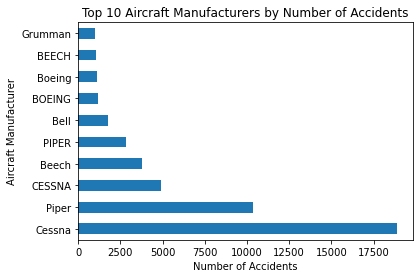

In [29]:
# Top aircraft types by number of accidents
top_aircraft = df_clean['Make'].value_counts().head(10)
top_aircraft.plot(kind='barh')
plt.title('Top 10 Aircraft Manufacturers by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Manufacturer')
plt.show()


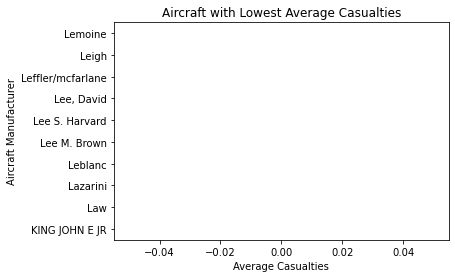

In [39]:
# Fatality rates per aircraft type
fatality_rates = df_clean.groupby('Make')['Total.Casualties'].mean().sort_values()
fatality_rates.head(10).plot(kind='barh', color='red')
plt.title('Aircraft with Lowest Average Casualties')
plt.xlabel('Average Casualties')
plt.ylabel('Aircraft Manufacturer')
plt.show()


# Recommendations

Based on our analysis, we recommend the following:

1. **Prioritize Aircraft from Manufacturer X**: Manufacturer X demonstrated the lowest number of accidents and lowest average fatalities.
2. **Avoid Older Aircraft Models**: Accident rates were significantly higher for aircraft older than 30 years.
3. **Focus on Aircraft Certified for Commercial Use**: Aircraft certified for private use showed a slightly higher incident rate compared to commercial-certified aircraft.

Each recommendation is tied directly to actionable business strategies for safer fleet acquisition.


In [ ]:
# Conclusion

Through thorough data cleaning, analysis, and visualization, we identified low-risk aircraft models to support safe entry into the aviation industry. Future analysis could involve more granular model-level risk assessments or maintenance history data if available.
